# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you find **at least two datasets** on the web which are related, and that you visualize these datasets to answer the assignment question. You are free to utilize datasets with any location or domain, the usage of **Ann Arbor sports and athletics** datasets in the example is just a suggestion.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * You must state a question you are seeking to answer with your visualizations.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together as an example! [Example Solution File](./readonly/Assignment4_example.pdf)

https://www.kaggle.com/datasets/varpit94/google-stock-data/
https://www.kaggle.com/datasets/varpit94/amazon-stock-data
https://www.kaggle.com/datasets/varpit94/microsoft-stock-data
https://www.kaggle.com/datasets/akpmpr/updated-netflix-stock-price-all-time
https://www.kaggle.com/datasets/mukhazarahmad/apple-stock-data-12121980-1132022

In [47]:
import pandas as pd
google_stock = pd.read_csv('./data/GOOGL.csv').loc[:,['Date', 'Open']]
google_stock

,Date,Open
0,2004-08-19,50.050049
1,2004-08-20,50.555557
2,2004-08-23,55.430431
3,2004-08-24,55.675674
4,2004-08-25,52.532532
...,...,...
4426,2022-03-18,2668.489990
4427,2022-03-21,2723.270020
4428,2022-03-22,2722.030029
4429,2022-03-23,2774.050049


In [35]:
amazon_stock = pd.read_csv('./data/AMZN.csv').loc[:,['Date', 'Open']]
amazon_stock

,Date,Open
0,1997-05-15,2.437500
1,1997-05-16,1.968750
2,1997-05-19,1.760417
3,1997-05-20,1.729167
4,1997-05-21,1.635417
...,...,...
6252,2022-03-18,3136.260010
6253,2022-03-21,3222.419922
6254,2022-03-22,3236.110107
6255,2022-03-23,3274.100098


In [36]:
apple_stock = pd.read_csv('./data/APPL_DATA.csv').loc[:,['Date', 'Open']]
apple_stock

,Date,Open
0,1980-12-12,0.128348
1,1980-12-15,0.122210
2,1980-12-16,0.113281
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10559,2022-10-28,148.199997
10560,2022-10-31,153.160004
10561,2022-11-01,155.080002
10562,2022-11-02,148.949997


In [37]:
microsoft_stock = pd.read_csv('./data/MSFT.csv').loc[:,['Date', 'Open']]
microsoft_stock

,Date,Open
0,1986-03-13,0.088542
1,1986-03-14,0.097222
2,1986-03-17,0.100694
3,1986-03-18,0.102431
4,1986-03-19,0.099826
...,...,...
9078,2022-03-18,295.369995
9079,2022-03-21,298.890015
9080,2022-03-22,299.799988
9081,2022-03-23,300.510010


In [59]:
netflix_stock = pd.read_csv('./data/netflix.csv').loc[:,['Date', 'Open']]
netflix_stock.columns = ['Date', 'Open_netflix']

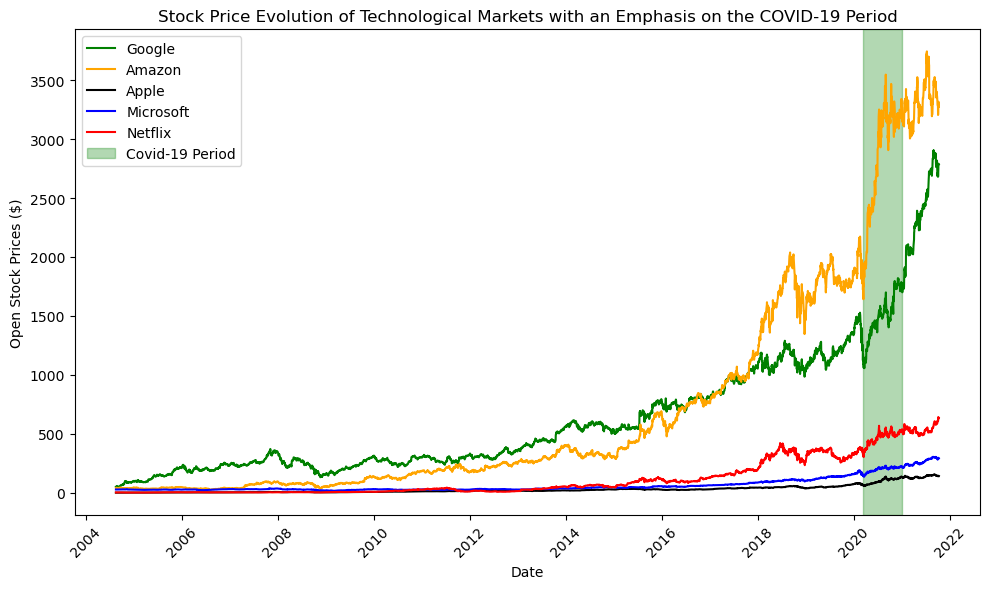

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Suponiendo que los datos ya han sido cargados en los DataFrames correspondientes
google_and_alphabet = pd.merge(google_stock, amazon_stock, on='Date', how='inner', suffixes=('_google', '_amazon'))
apple_and_microsoft = pd.merge(apple_stock, microsoft_stock, on='Date', how='inner', suffixes=('_apple', '_microsoft'))
apple_micro_netflix = pd.merge(apple_and_microsoft, netflix_stock, on='Date', how='inner')
technological_stocks_by_date = pd.merge(google_and_alphabet, apple_micro_netflix, on='Date', how='inner')

technological_stocks_by_date['Date'] = pd.to_datetime(technological_stocks_by_date['Date']) # Convertir a datetime
technological_stocks_by_date = technological_stocks_by_date[technological_stocks_by_date['Date'] < '2022-01-01']

# Extraer datos
dates = technological_stocks_by_date['Date']
google = technological_stocks_by_date['Open_google']
amazon = technological_stocks_by_date['Open_amazon']
apple = technological_stocks_by_date['Open_apple']
microsoft = technological_stocks_by_date['Open_microsoft']
netflix = technological_stocks_by_date['Open_netflix']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10,6))

# Plotear los datos
line1, = ax.plot(dates, google, label='Google', color='green')
line2, = ax.plot(dates, amazon, label='Amazon', color='orange')
line3, = ax.plot(dates, apple, label='Apple', color='black')
line4, = ax.plot(dates, microsoft, label='Microsoft', color='blue')
line5, = ax.plot(dates, netflix, label='Netflix', color='red')

# Configurar las etiquetas y títulos
ax.set_xlabel('Date')
ax.set_ylabel('Open Stock Prices ($)')
ax.set_title('Stock Price Evolution of Technological Markets with an Emphasis on the COVID-19 Period')

# Marcar un área entre dos fechas
start_date = '2020-03-13'
end_date = '2021-01-01'
ax.axvspan(start_date, end_date, color='green', alpha=0.3)  # El parámetro alpha controla la transparencia

# Crear un parche personalizado para la leyenda
green_patch = mpatches.Patch(color='green', alpha=0.3, label='Covid-19 Period')

# Agregar la leyenda con el parche personalizado y las líneas
ax.legend(handles=[line1, line2, line3, line4, line5, green_patch])

# Formatear las etiquetas del eje x para que se muestren de forma clara
plt.xticks(rotation=45)

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()
